# Write a 2D netCDF file

Solution of the exercice where we have to write a 2-dimensional netCDF file.      
The main module we need is [`NCDatasets`](https://github.com/Alexander-Barth/NCDatasets.jl).

In [6]:
using NCDatasets
using Makie, CairoMakie, GeoMakie
include("../config.jl")

"https://dox.uliege.be/index.php/s/qJtEotmkCZVqcx8/download"

## Data
We create fake data: temperature as a random field, longitude and latitude as regularly spaced vectors.

In [7]:
dlon = 0.25;    # longitude resolution
dlat = 0.25;   # latitude resolution
lonmin = 27.;
lonmax = 42.;
latmin = 40.;
latmax = 48.;

In [8]:
lonvalues = collect(lonmin:dlon:lonmax);
latvalues = collect(latmin:dlat:latmax);
temperature = rand(length(latvalues), length(lonvalues));

In [9]:
temperature

33×61 Matrix{Float64}:
 0.157      0.525064   0.457745   …  0.634554   0.812859   0.653283
 0.137792   0.233118   0.532213      0.13547    0.873757   0.0424548
 0.41053    0.244675   0.0551177     0.165076   0.880978   0.977098
 0.219289   0.018246   0.812235      0.21889    0.913274   0.908948
 0.81734    0.871357   0.23808       0.178075   0.432991   0.12262
 0.826892   0.241751   0.950755   …  0.726878   0.710896   0.891658
 0.959987   0.396533   0.221468      0.461494   0.357366   0.547282
 0.461229   0.284242   0.715766      0.460551   0.0750633  0.361118
 0.203258   0.837203   0.589993      0.616682   0.388031   0.643082
 0.643197   0.585262   0.620079      0.358655   0.738562   0.0345651
 0.690009   0.529622   0.946046   …  0.409195   0.219427   0.835561
 0.196866   0.218842   0.319841      0.263133   0.768742   0.926392
 0.783254   0.456681   0.481075      0.930997   0.520851   0.422808
 ⋮                                ⋱                        ⋮
 0.303371   0.944991   0.446533

We can check the size of the temperature field:

In [10]:
@show size(temperature);
@show size(lonvalues)

size(temperature) = (33, 61)
size(lonvalues) = (61,)


(61,)

## NetCDF creation
First we create a dataset.     
We remove the file in case it already exists.

In [11]:
datafile = joinpath(datadir, "temp_exercise.nc")
if isfile(datafile)
    @info("File already exists, will remove it")
    rm(datafile)
end
ds = Dataset(datafile, "c");

Then we define the dimensions (`lon` and `lat`):

In [12]:
length(lonvalues), length(latvalues)

(61, 33)

In [13]:
defDim(ds, "lon", length(lonvalues));
defDim(ds, "lat", length(latvalues));

We continue by defining the variables corresponding to the coordinates:

In [14]:
defVar(ds, "lon", Float64, ("lon",));
defVar(ds, "lat", Float64, ("lat",));

to which we can assign a value:

In [15]:
ds["lon"][:] = lonvalues;
ds["lat"][:] = latvalues;

Finally we define the temperature variable and assign a value to it:

In [16]:
T = defVar(ds, "temperature", Float64, ("lat", "lon"));
T[:] = temperature;
close(ds)

closed Dataset

The last line `close(ds)` closes the netCDF file.     
It is also possible to use a _do-block_, as shown below:

In [12]:
Dataset(datafile, "c") do ds
    ...
    ...
end

LoadError: syntax: invalid identifier name "..."

## 🖋️ Create a plot to check

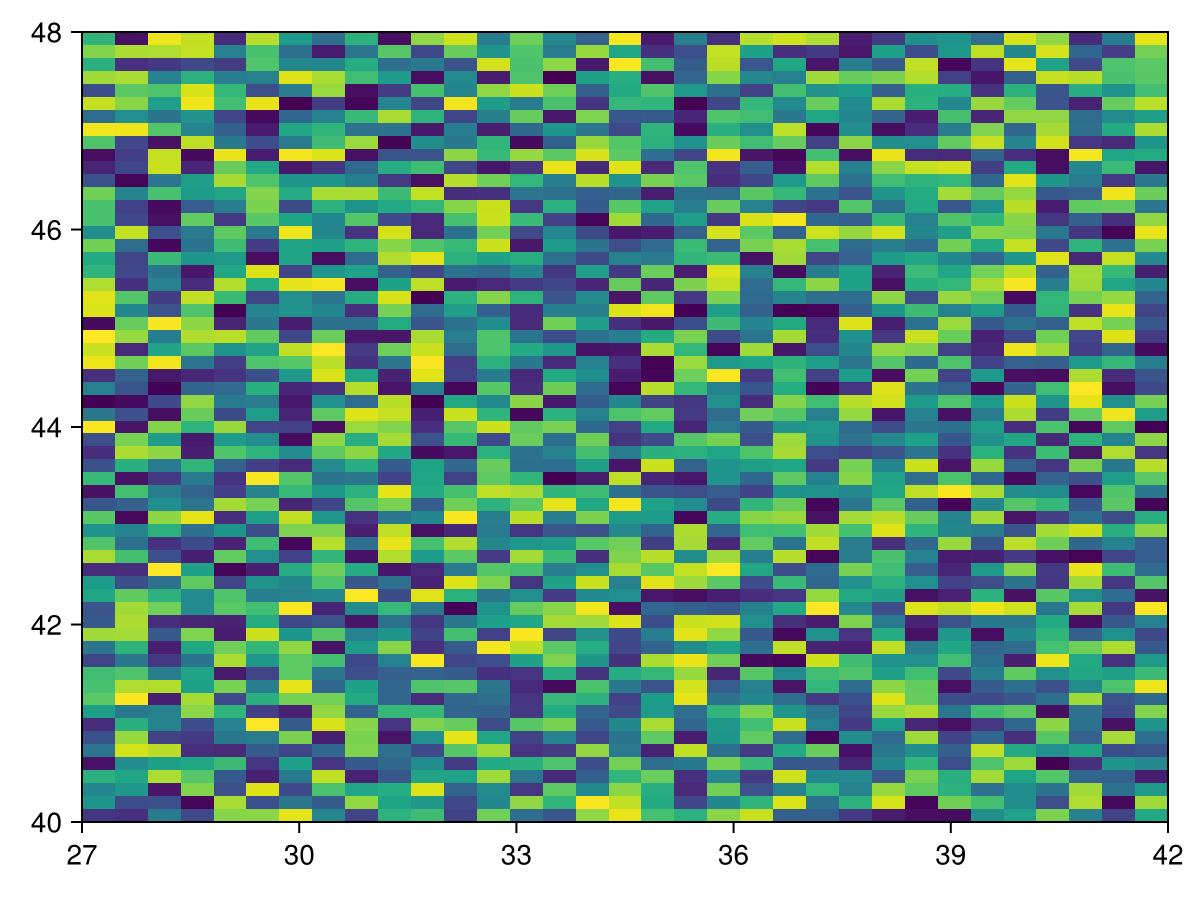

In [17]:
heatmap(..., ..., ...)